In [1]:
import pandas
from datetime import datetime
from pytz import utc
import matplotlib.pyplot as plt
data = pandas.read_csv("reviews.csv", parse_dates = ["Timestamp"])

In [2]:
data.head()

,Course Name,Timestamp,Rating,Comment
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN


### Average rating/count by day

In [3]:
data["Day"] = data["Timestamp"].dt.date
data.head()

,Course Name,Timestamp,Rating,Comment,Day
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN,2021-04-02
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN,2021-04-02
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN,2021-04-02
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN,2021-04-02
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN,2021-04-02


In [4]:
day_average = data.groupby(["Day"]).mean()
day_average

,Rating
Day,
2018-01-01,4.532609
2018-01-02,4.122807
2018-01-03,4.360465
2018-01-04,4.531250
2018-01-05,4.423077
...,...
2021-03-29,4.240000
2021-03-30,4.428571
2021-03-31,4.453125


In [5]:
day_average.columns

Index(['Rating'], dtype='object')

In [6]:
day_average["Rating"]

Day
2018-01-01    4.532609
2018-01-02    4.122807
2018-01-03    4.360465
2018-01-04    4.531250
2018-01-05    4.423077
                ...   
2021-03-29    4.240000
2021-03-30    4.428571
2021-03-31    4.453125
2021-04-01    4.592593
2021-04-02    4.357143
Name: Rating, Length: 1188, dtype: float64

In [7]:
day_average.index

Index([2018-01-01, 2018-01-02, 2018-01-03, 2018-01-04, 2018-01-05, 2018-01-06,
       2018-01-07, 2018-01-08, 2018-01-09, 2018-01-10,
       ...
       2021-03-24, 2021-03-25, 2021-03-26, 2021-03-27, 2021-03-28, 2021-03-29,
       2021-03-30, 2021-03-31, 2021-04-01, 2021-04-02],
      dtype='object', name='Day', length=1188)

In [8]:
list(day_average.index)

[datetime.date(2018, 1, 1),
 datetime.date(2018, 1, 2),
 datetime.date(2018, 1, 3),
 datetime.date(2018, 1, 4),
 datetime.date(2018, 1, 5),
 datetime.date(2018, 1, 6),
 datetime.date(2018, 1, 7),
 datetime.date(2018, 1, 8),
 datetime.date(2018, 1, 9),
 datetime.date(2018, 1, 10),
 datetime.date(2018, 1, 11),
 datetime.date(2018, 1, 12),
 datetime.date(2018, 1, 13),
 datetime.date(2018, 1, 14),
 datetime.date(2018, 1, 15),
 datetime.date(2018, 1, 16),
 datetime.date(2018, 1, 17),
 datetime.date(2018, 1, 18),
 datetime.date(2018, 1, 19),
 datetime.date(2018, 1, 20),
 datetime.date(2018, 1, 21),
 datetime.date(2018, 1, 22),
 datetime.date(2018, 1, 23),
 datetime.date(2018, 1, 24),
 datetime.date(2018, 1, 25),
 datetime.date(2018, 1, 26),
 datetime.date(2018, 1, 27),
 datetime.date(2018, 1, 28),
 datetime.date(2018, 1, 29),
 datetime.date(2018, 1, 30),
 datetime.date(2018, 1, 31),
 datetime.date(2018, 2, 1),
 datetime.date(2018, 2, 2),
 datetime.date(2018, 2, 3),
 datetime.date(2018, 2, 4)

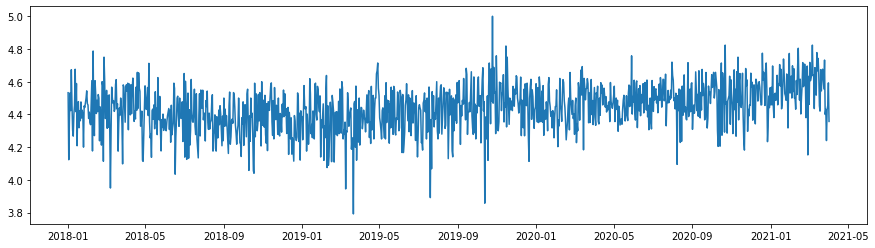

In [9]:
plt.figure(figsize=(15,4))
plt.plot(day_average.index, day_average["Rating"])

In [10]:
day_average = data.groupby(["Day"]).count()
day_average

,Course Name,Timestamp,Rating,Comment
Day,,,,
2018-01-01,46,46,46,7
2018-01-02,57,57,57,16
2018-01-03,43,43,43,8
2018-01-04,48,48,48,11
2018-01-05,52,52,52,15
...,...,...,...,...
2021-03-29,25,25,25,1
2021-03-30,35,35,35,1
2021-03-31,32,32,32,3


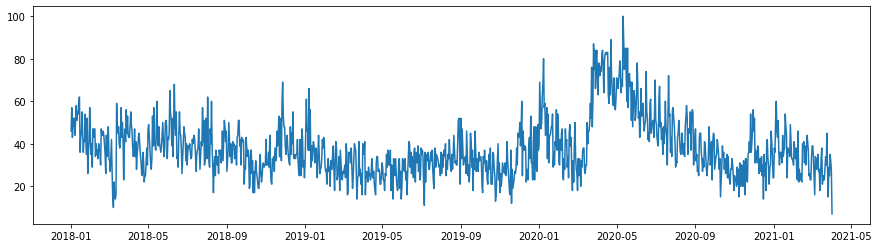

In [11]:
plt.figure(figsize=(15,4))
plt.plot(day_average.index, day_average["Rating"])

### Rating average by week

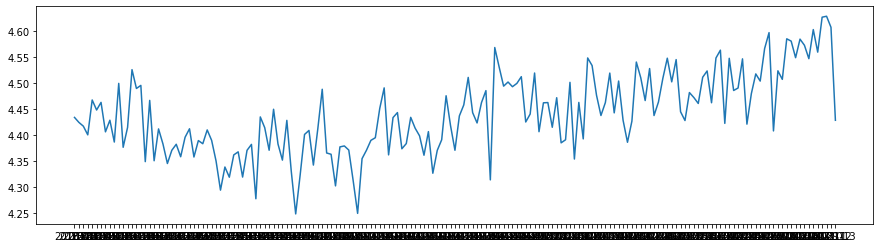

In [12]:
data["Week"] = data["Timestamp"].dt.strftime("%Y-%U")
average_week = data.groupby(data["Week"]).mean()

plt.figure(figsize=(15,4))
plt.plot(average_week.index, average_week["Rating"])

### Average raint by month

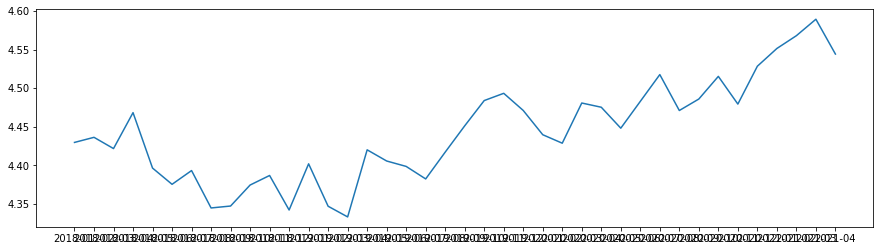

In [13]:
data["Month"] = data["Timestamp"].dt.strftime("%Y-%m")
average_month = data.groupby(data["Month"]).mean()

plt.figure(figsize=(15,4))
plt.plot(average_month.index, average_month["Rating"])

### Average rating by month by course

In [27]:
data["Month"] = data["Timestamp"].dt.strftime("%Y-%m")
average_month_course = data.groupby(["Month", "Course Name"]).mean().unstack()
average_month_course

Rating  \
Course Name 100 Python Exercises I: Evaluate and Improve Your Skills   
Month                                                                  
2018-01                                               4.353448         
2018-02                                               4.250000         
2018-03                                               4.500000         
2018-04                                               4.431034         
2018-05                                               4.358696         
2018-06                                               4.268293         
2018-07                                               4.589286         
2018-08                                               4.353659         
2018-09                                               4.238636         
2018-10                                               4.106061         
2018-11                                               4.212766         
2018-12                                               4.405172         
2019-01                                               4.048780         
2019-02                                               4.333333         
2019-03                                               4.269231         
2019-04                                               4.365854         
2019-05                                               4.486111         
2019-06                                               4.442308         
2019-07                                               4.414634         
2019-08                                               4.222222         
2019-09                                               4.531250         
2019-10                                               4.287500         
2019-11                                               4.512195         
2019-12                                               4.152778         
2020-01                                               4.277778         
2020-02                                               4.200000         
2020-03                                               4.240000         
2020-04                                               4.329268         
2020-05                                               4.340909         
2020-06                                               4.397059         
2020-07                                               4.250000         
2020-08                                               4.121622         
2020-09                                               4.307692         
2020-10                                               4.366667         
2020-11                                               4.461538         
2020-12                                               4.294118         
2021-01                                               4.283333         
2021-02                                               4.450000         
2021-03                                               4.190476         
2021-04                                               4.500000         

                                                                       \
Course Name 100 Python Exercises II: Evaluate and Improve Your Skills   
Month                                                                   
2018-01                                                    NaN          
2018-02                                                    NaN          
2018-03                                                    NaN          
2018-04                                                    NaN          
2018-05                                                    NaN          
2018-06                                                    NaN          
2018-07                                                    NaN          
2018-08                                                    NaN          
2018-09                                                    NaN          
2018-10                                                    NaN          
2018-11         

<AxesSubplot:xlabel='Month'>

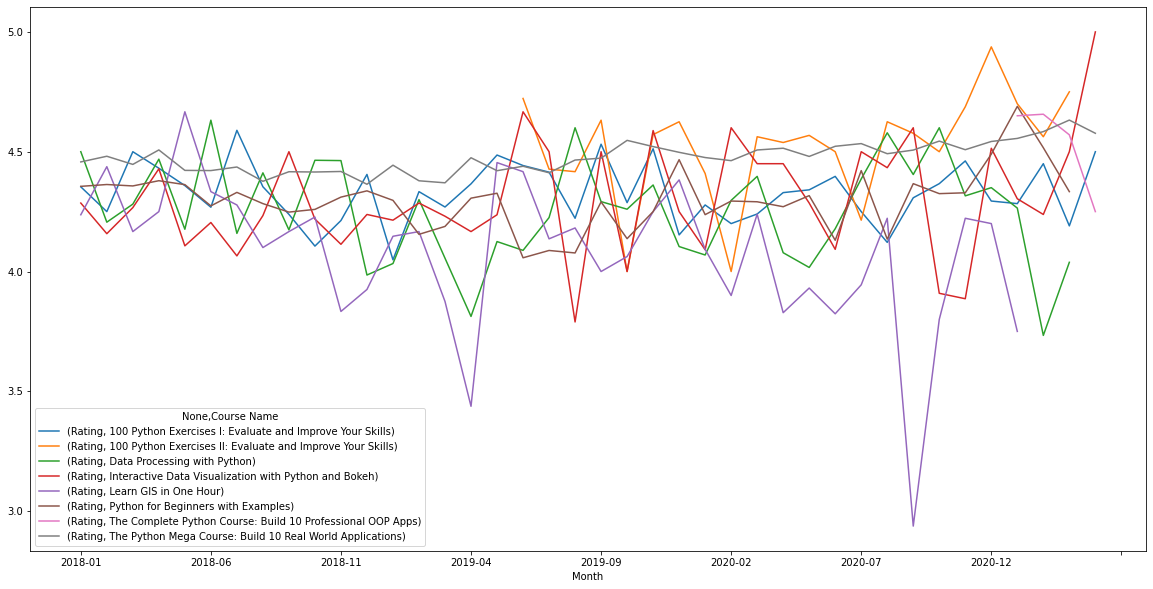

In [33]:
average_month_course.plot(figsize=(20,10))

### average count by month by course

<AxesSubplot:xlabel='Month'>

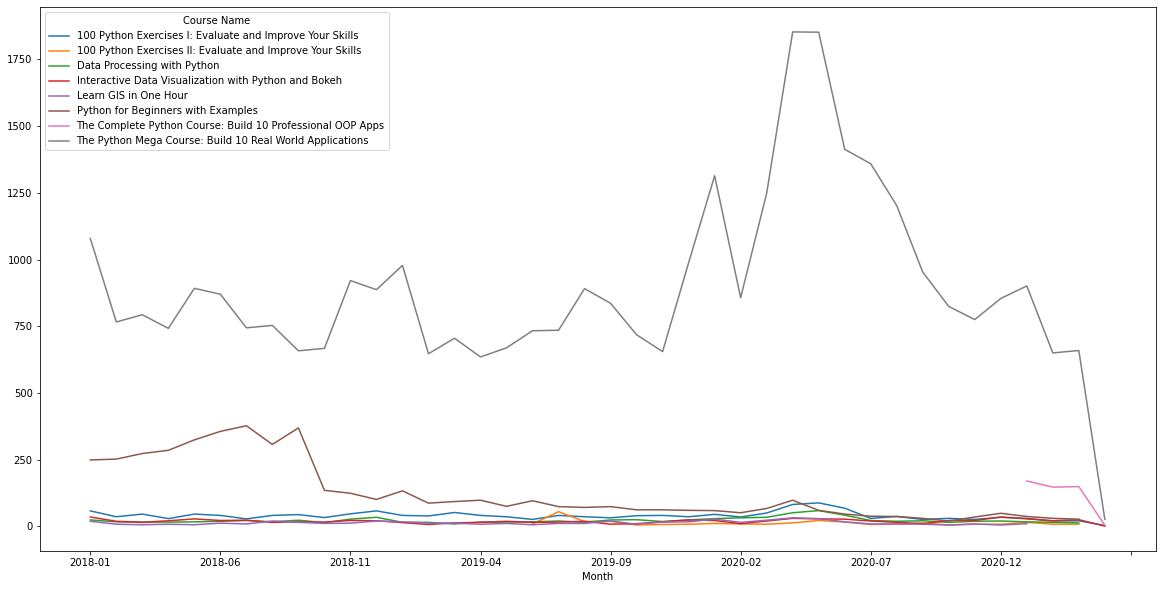

In [35]:
data["Month"] = data["Timestamp"].dt.strftime("%Y-%m")
average_month_course = data.groupby(["Month", "Course Name"])["Rating"].count().unstack()
average_month_course.plot(figsize=(20,10))